# Health insurance Analysis


#### Objective: Identify key factors that influence health insurance costs using exploratory data analysis (EDA) and linear regression modeling.


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [57]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
# checking basic information of the dataset, like datatype. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
#Summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [60]:
# checked if there is any null value. 
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Exploratory Data Analysis



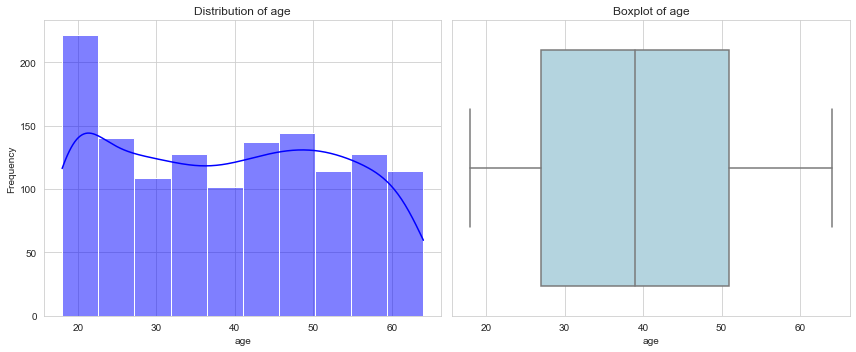

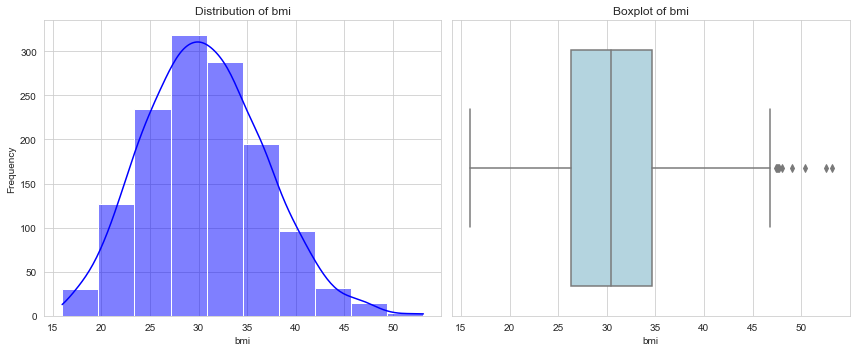

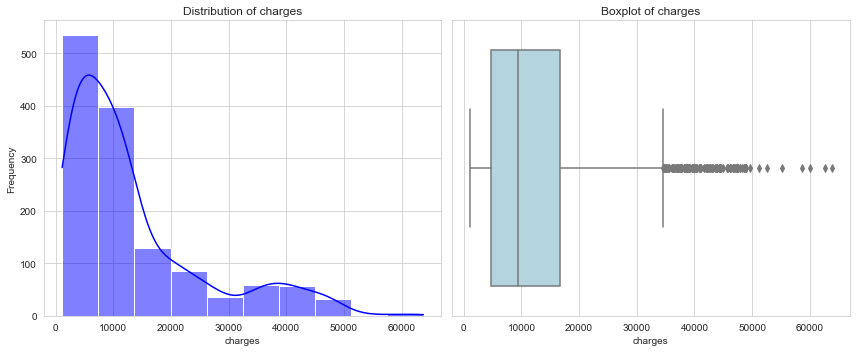

In [61]:
#### Focus of each variable

sns.set_style("whitegrid")
numerical_vars = ["age", "bmi", "charges"]

for var in numerical_vars:
    plt.figure(figsize = (12,5))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[var], kde =True, bins =10, color = "blue" )
    plt.title(f"Distribution of {var}" )
    plt.xlabel(var)
    plt.ylabel("Frequency")
    
     # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color='lightblue')
    plt.title(f"Boxplot of {var}")
    plt.xlabel(var)

    plt.tight_layout()
    plt.show()
    
    

In [62]:
''''The age distribution in the dataset ranges from 18 to 64 years old, with a mean of 39 years. 
The Body Mass Index (BMI) is approximately normally distributed, with most values falling 
between 25 and 35, which corresponds to the typical range of overweight to obesity. Values 
above 46 are considered outliers, likely associated with chronic illnesses or expensive 
treatments and surgeries. Regarding insurance charges, the majority of data points are 
concentrated between 0 and $15,000, but there is a long tail extending to much higher values, 
reaching up to $60,000. This suggests that while most insurance charges are relatively low, 
some individuals incur exceptionally high costs, likely due to health conditions or other 
factors. The outlier values above $60,000 represent unusually high insurance charges.''''

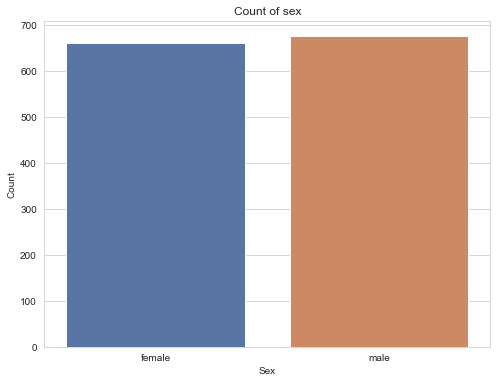

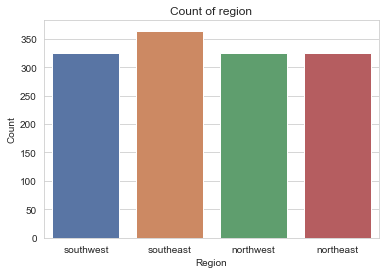

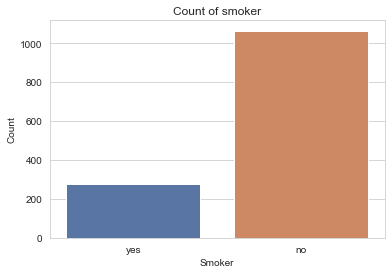

In [72]:
# Categorical Variables
categorical_vars = ['sex', 'region', 'smoker']

plt.figure(figsize=(8, 6))  # Set figure size once

for var in categorical_vars:
    sns.countplot(x=df[var], palette='deep')
    plt.title(f"Count of {var}")
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')

    plt.show()

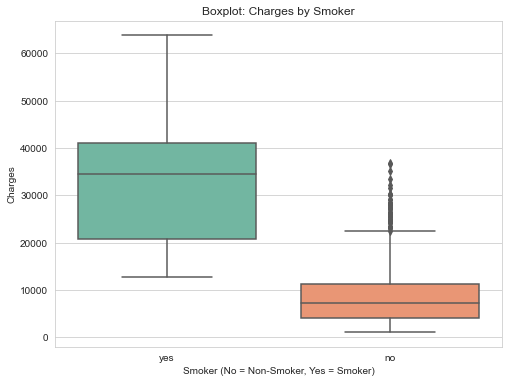

In [50]:
# Boxplot for charges by smoker (using 'yes' and 'no' directly)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')

plt.title('Boxplot: Charges by Smoker')
plt.xlabel('Smoker (No = Non-Smoker, Yes = Smoker)')
plt.ylabel('Charges')
plt.show()


In [ ]:
'''In terms of gender, there is a nearly equal split, with 676 males and 662 females. 
Regarding smoking habits, the majority of individuals in the dataset are non-smokers,
accounting for 1,064 people, while 274 individuals are smokers. When examining regional
distribution, the population is fairly evenly spread across the four regions: the Southeast 
has the highest count at 364, followed closely by the Southwest and Northwest,
each with 325, and the Northeast with 324. These distributions provide a clear overview 
of the dataset’s demographic composition.'''

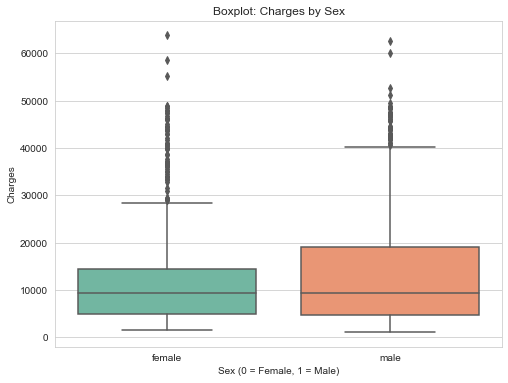

In [33]:
# Boxplot for charges by sex (0 = Female, 1 = Male)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='charges', palette='Set2')
plt.title('Boxplot: Charges by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Charges')
plt.show()


In [ ]:
''''The analysis of the charges by sex reveals that the median charge for females is approximately
9,400, with outliers identified for charges exceeding 28K. For males, the median charge 
is slightly lower at around 9,300, with outliers occurring for charges greater than 40k.
These findings highlight that while the medians for both groups are quite similar, there are 
distinct outliers in each group, particularly for males, where the charges are notably higher,
which could be associated to specific health conditions or other factors..''''

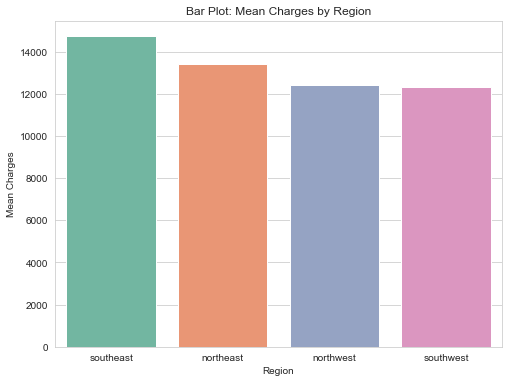

In [34]:
# Bar plot for mean charges by region
mean_charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', palette='Set2', ci=None, order=mean_charges_by_region.index)

plt.title('Bar Plot: Mean Charges by Region')
plt.xlabel('Region')
plt.ylabel('Mean Charges')
plt.show()



In [81]:
# Calculate mean charges by region
mean_charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)
print("Mean charges by region:")
print(mean_charges_by_region)


Mean charges by region:
region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: charges, dtype: float64


In [ ]:
'''The analysis of mean charges by region reveals that the Southeast region has the highest average
charges at approximately 14,735, followed by the Northeast with an average of 13,406. 
The Northwest and Southwest regions have slightly lower average charges, with the Northwest
at 12,418 and the Southwest at 12,347. These findings suggest that the highest mean charges
are located in the eastern part of the country, with the Southeast and Northeast 
regions having the highest average charges'''

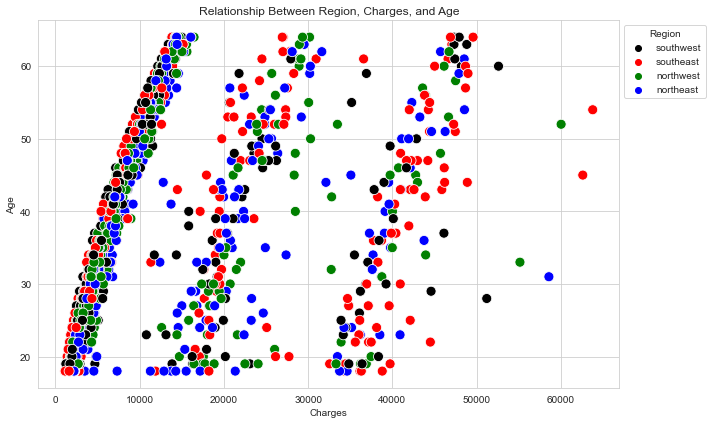

In [35]:
#Relationship between region, charges and age. 

# color mapping for regions
color_mapping = {
    'northwest': 'green',
    'northeast': 'blue',
    'southeast': 'red',
    'southwest': 'black'
}

# Apply the custom color mapping to the 'region' column
df['color'] = df['region'].map(color_mapping)

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='charges', y='age', hue='region', palette= color_mapping, s=100)

# Set plot labels
plt.title('Relationship Between Region, Charges, and Age')
plt.xlabel('Charges')
plt.ylabel('Age')


# Move the legend outside the plot using bbox_to_anchor
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()




In [ ]:
''''The previous mapping shows the relationship between region, charges and age.'''











In [36]:
# One-Hot Encoding for 'region' (keep all regions)
df = pd.get_dummies(df, columns=['region'], drop_first=False)

# Binary Encoding for 'sex' and 'smoker'
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Display the modified DataFrame
print(df.head())



   age  sex     bmi  children  smoker      charges  color  region_northeast  \
0   19    1  27.900         0       1  16884.92400  black                 0   
1   18    0  33.770         1       0   1725.55230    red                 0   
2   28    0  33.000         3       0   4449.46200    red                 0   
3   33    0  22.705         0       0  21984.47061  green                 0   
4   32    0  28.880         0       0   3866.85520  green                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  



Correlation Matrix:
              age       bmi   charges    smoker       sex
age      1.000000  0.109272  0.299008 -0.025019  0.020856
bmi      0.109272  1.000000  0.198341  0.003750 -0.046371
charges  0.299008  0.198341  1.000000  0.787251 -0.057292
smoker  -0.025019  0.003750  0.787251  1.000000 -0.076185
sex      0.020856 -0.046371 -0.057292 -0.076185  1.000000


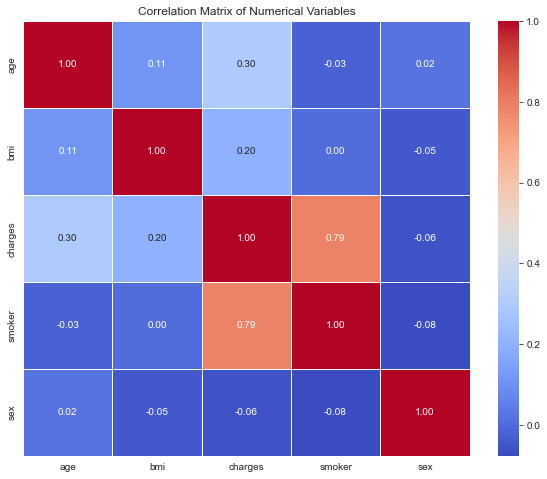

In [39]:
# Correlation between numerical variables 'age', 'bmi', 'charges', 'smoker', 'sex'.

correlation_matrix = df[['age', 'bmi', 'charges', 'smoker', 'sex']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5 )
plt.title('Correlation Matrix of Numerical Variables')
plt.show()




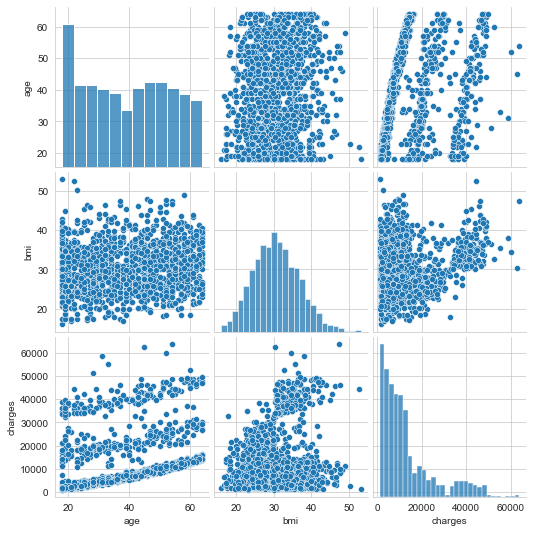

In [14]:
sns.pairplot(df[['age', 'bmi', 'charges']])
plt.show()

In [15]:
#Scaling Numerical Variables

In [16]:
# Listing of numerical columns to scale
#Scaling the numerical variables age, bmi, and charges to ensure all features have
# a similar scale, which helps linear regression perform better. 
numerical_cols = ['age', 'bmi', 'charges']


scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].head())


        age       bmi   charges
0 -1.438764 -0.453320  0.298584
1 -1.509965  0.509621 -0.953689
2 -0.797954  0.383307 -0.728675
3 -0.441948 -1.305531  0.719843
4 -0.513149 -0.292556 -0.776802


In [17]:
# Create interaction terms
df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_smoker'] = df['age'] * df['smoker']

# Check the new columns
print(df[['bmi_smoker', 'age_smoker']].head())


   bmi_smoker  age_smoker
0    -0.45332   -1.438764
1     0.00000   -0.000000
2     0.00000   -0.000000
3    -0.00000   -0.000000
4    -0.00000   -0.000000


In [18]:
# Check the first few rows of the modified DataFrame
print(df.head())

# Check the dataset shape to ensure no rows/columns were dropped unexpectedly
print("Dataset shape:", df.shape)

# Check the column names
print("Columns in the dataset:", df.columns)


        age  sex       bmi  children  smoker   charges  color  \
0 -1.438764    1 -0.453320         0       1  0.298584  black   
1 -1.509965    0  0.509621         1       0 -0.953689    red   
2 -0.797954    0  0.383307         3       0 -0.728675    red   
3 -0.441948    0 -1.305531         0       0  0.719843  green   
4 -0.513149    0 -0.292556         0       0 -0.776802  green   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0                 0                 0                 0                 1   
1                 0                 0                 1                 0   
2                 0                 0                 1                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   bmi_smoker  age_smoker  
0    -0.45332   -1.438764  
1     0.00000   -0.000000  
2     0.00000   -0.000000  
3    -0.00000   -0.000000  
4    -

In [19]:
# Check mean and standard deviation of scaled features
# Mean of 0 and a standard deviation of 1

# Charges having a mean close to 0, even if it's a very small number like -6.007485e-17,
#indicates that the scaling worked correctly, just like the other features
print("Mean of scaled features:")
print(df[numerical_cols].mean())
print("\nStandard deviation of scaled features:")
print(df[numerical_cols].std())


Mean of scaled features:
age       -1.853691e-16
bmi       -1.869041e-16
charges   -6.007485e-17
dtype: float64

Standard deviation of scaled features:
age        1.000374
bmi        1.000374
charges    1.000374
dtype: float64


##  Linear Regression:
#### Predicting insurance charges based on demographic and medical information (BMI).

In [20]:


# Define the features (X) and target (y)
X = df.drop(columns=['charges', 'color'])  # Drop 'charges' (target) and 'color' (not needed for prediction)
y = df['charges']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"Training data shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing data shape: X_test {X_test.shape}, y_test {y_test.shape}")


Training data shape: X_train (1070, 11), y_train (1070,)
Testing data shape: X_test (268, 11), y_test (268,)


In [21]:


# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the charges on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.14277475742203918
R-squared (R²): 0.8652316979531681


In [ ]:
''''A lower MSE suggests better model performance. Since 0.1427 is relatively small, 
the model’s predictions are quite close to the actual values.
R-squared of 0.86 means the model explains 86% of the variance in health insurance charges,
which is quite strong. However, it still leaves 14% unexplained, which could be due to
missing features or model limitations.''''

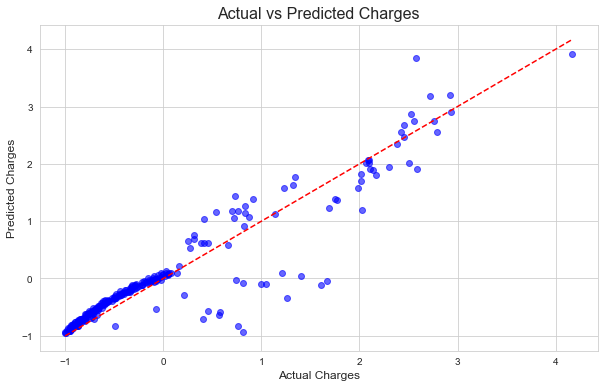

In [22]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Charges
plt.figure(figsize=(10,6))

# Scatter plot of actual vs predicted charges
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Add a line for perfect predictions (45-degree line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Labels and title
plt.title('Actual vs Predicted Charges', fontsize=16)
plt.xlabel('Actual Charges', fontsize=12)
plt.ylabel('Predicted Charges', fontsize=12)

plt.show()


In [ ]:
'''The Actual vs. Predicted Charges plot shows how well the model predicts health insurance 
charges. Blue scatter points represent individual predictions, and the red dashed line indicates
perfect prediction. While many points align with the line, some deviations suggest prediction 
errors, possibly due to outliers, feature limitations, or model complexity. Further model 
or exploring non-linear relationships may improve results.'''

